Mini-Project for DSE200x

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('/movielens/movies.csv', sep=',')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
import string 

years = [] #list of years as ints
error = 0

for e in range(len(movies.title)):
    try:
        years.append(int(movies.title[e].split()[-1].strip("()" + string.ascii_letters)))
    except:
        years.append(0)
        error += 1
        
print("Error percentage: " + str(round(error/len(movies.title) * 100, 3)) + " %")
movies["year"] = years

movies.head()

Error percentage: 0.641 %


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [25]:
is_horror = movies['genres'].str.contains('Horror')
horror = movies[is_horror].copy()

In [26]:
horror.head()

,movieId,title,genres,year
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,1995
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
90,92,Mary Reilly (1996),Drama|Horror|Thriller,1996
91,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance,1995


In [27]:
missing_year = horror['year'] == 0
horror[missing_year]

,movieId,title,genres,year
30443,136299,Red Victoria,Comedy|Horror,0
32880,141930,KillerSaurus,Horror|Sci-Fi,0
43315,165747,Exchange,Horror,0
48511,176803,What the Waters Left Behind,Horror,0
49647,179317,Clementina,Drama|Horror,0
50187,180455,The End?,Horror,0
50189,180461,3rd Night,Horror,0
50230,180553,Trauma,Horror,0
50732,181669,Inoperable,Horror,0
52163,184703,The Body Tree,Horror|Thriller,0


In [28]:
horror.loc[30443, ['year']] = 2008
horror.loc[32880, ['year']] = 2015
horror.loc[43315, ['year']] = 2016
horror.loc[48511, ['year']] = 2017
horror.loc[49647, ['year']] = 2017
horror.loc[50187, ['year']] = 2017
horror.loc[50189, ['year']] = 2017
horror.loc[50230, ['year']] = 2017
horror.loc[50732, ['year']] = 2017
horror.loc[52163, ['year']] = 2017
horror.loc[53937, ['year']] = 2017
horror.loc[54940, ['year']] = 2018
horror.loc[55023, ['year']] = 2018
horror.loc[61002, ['year']] = 2019
horror.loc[61027, ['year']] = 2009
horror.loc[61549, ['year']] = 2018
horror.loc[61868, ['year']] = 2017

In [10]:
horror[missing_year]

,movieId,title,genres,year
30443,136299,Red Victoria,Comedy|Horror,2008
32880,141930,KillerSaurus,Horror|Sci-Fi,2015
43315,165747,Exchange,Horror,2016
48511,176803,What the Waters Left Behind,Horror,2017
49647,179317,Clementina,Drama|Horror,2017
50187,180455,The End?,Horror,2017
50189,180461,3rd Night,Horror,2017
50230,180553,Trauma,Horror,2017
50732,181669,Inoperable,Horror,2017
52163,184703,The Body Tree,Horror|Thriller,2017


In [29]:
horror[horror['year'] < 1900]

,movieId,title,genres,year
27843,130322,Zone 261,Horror,261
43154,165397,Cinderella (1899),Children|Fantasy|Horror|Sci-Fi,1899
45958,171465,The Haunted Castle (1896),Fantasy|Horror,1896
47158,173921,A Terrible Night (1896),Comedy|Horror,1896
47185,173979,A Nightmare (1896),Horror,1896
47186,173981,The Haunted Castle (1897),Horror,1897
48108,175977,The Devil in a Convent (1899),Comedy|Fantasy|Horror,1899
61895,207199,Along Came the Devil 2,Horror|Thriller,2


In [12]:
horror.loc[27843, ['year']] = 2016
horror.loc[61895, ['year']] = 2019

In [13]:
horror['year'].min()

1896

In [14]:
horror['year'].max()

2019

In [15]:
fifties = horror[horror['year'].between(1950, 1959)]
sixties = horror[horror['year'].between(1960, 1969)]
seventies = horror[horror['year'].between(1970, 1979)]
eighties = horror[horror['year'].between(1980, 1989)]
nineties = horror[horror['year'].between(1990, 1999)]
zeros = horror[horror['year'].between(2000, 2009)]
teens = horror[horror['year'].between(2010, 2019)]

In [16]:
decade_data = {'Decade': ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
               'Number of Horror Films': [fifties.size, sixties.size, seventies.size, eighties.size, nineties.size, zeros.size, teens.size]    
                }
decade_count = pd.DataFrame(decade_data, columns = ['Decade', 'Number of Horror Films'])

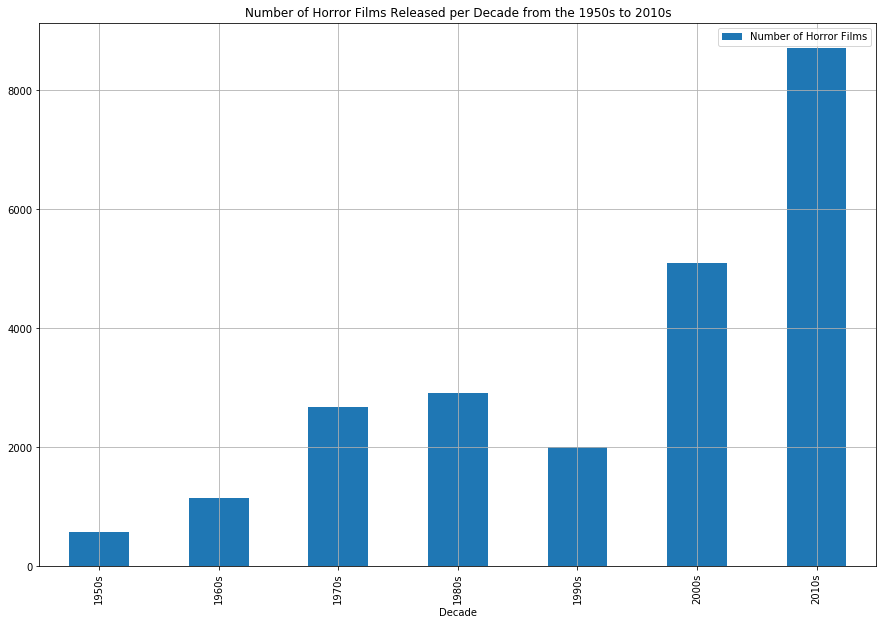

In [17]:
%matplotlib inline

decade_count.plot(kind='bar', x='Decade', y='Number of Horror Films', title='Number of Horror Films Released per Decade from the 1950s to 2010s', figsize=(15,10), grid=True)

In [18]:
overall_fifties = movies[movies['year'].between(1950, 1959)]
overall_sixties = movies[movies['year'].between(1960, 1969)]
overall_seventies = movies[movies['year'].between(1970, 1979)]
overall_eighties = movies[movies['year'].between(1980, 1989)]
overall_nineties = movies[movies['year'].between(1990, 1999)]
overall_zeros = movies[movies['year'].between(2000, 2009)]
overall_teens = movies[movies['year'].between(2010, 2019)]

In [19]:
overall_decade_data = {'Decade': ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
               'Number of Films': [overall_fifties.size, overall_sixties.size, overall_seventies.size, overall_eighties.size, overall_nineties.size, overall_zeros.size, overall_teens.size]    
                }
overall_decade_count = pd.DataFrame(overall_decade_data, columns = ['Decade', 'Number of Films'])

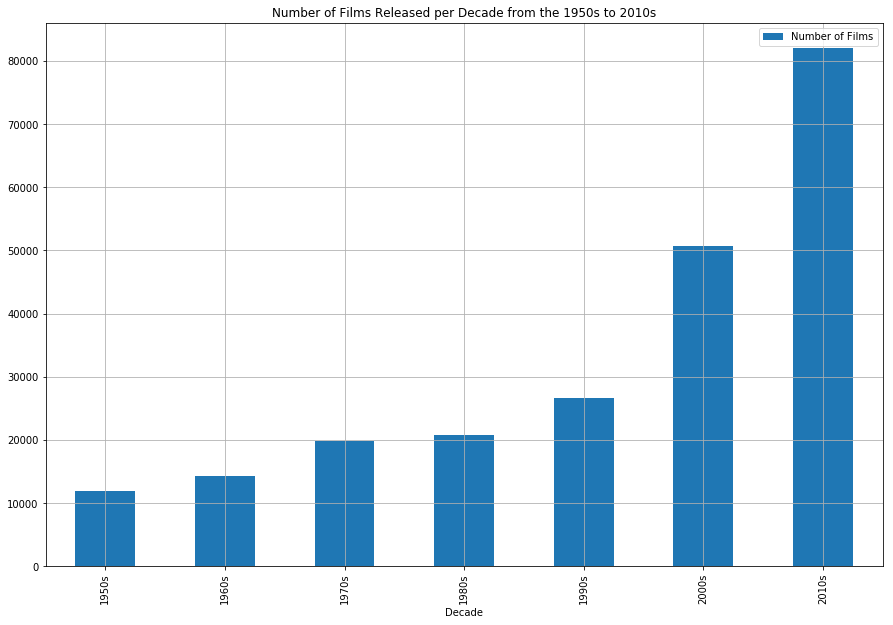

In [20]:
overall_decade_count.plot(kind='bar', x='Decade', y='Number of Films', title='Number of Films Released per Decade from the 1950s to 2010s', figsize=(15,10), grid=True)

In [21]:
horror_percentage_decade_data = {'Decade': ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
               'Percentage of Films Released that were Horror Films': [100*fifties.size/overall_fifties.size, 100*sixties.size/overall_sixties.size, 100*seventies.size/overall_seventies.size, 100*eighties.size/overall_eighties.size, 100*nineties.size/overall_nineties.size, 100*zeros.size/overall_zeros.size, 100*teens.size/overall_teens.size]    
                }
horror_percentage_decade_count = pd.DataFrame(horror_percentage_decade_data, columns = ['Decade', 'Percentage of Films Released that were Horror Films'])

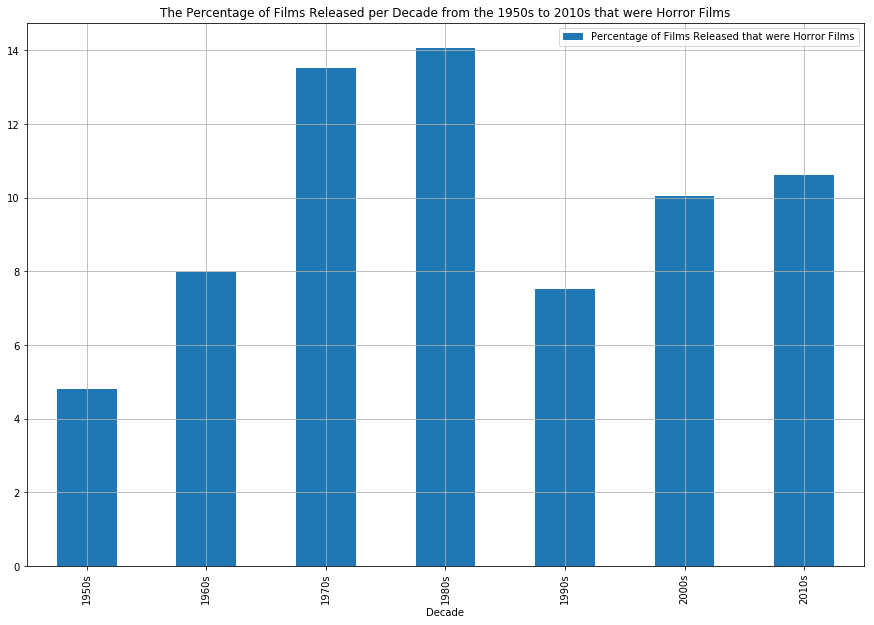

In [22]:
horror_percentage_decade_count.plot(kind='bar', x='Decade', y='Percentage of Films Released that were Horror Films', title='The Percentage of Films Released per Decade from the 1950s to 2010s that were Horror Films', figsize=(15,10), grid=True)